In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
ccMax = 96
time = 60
path = "/global/project/projectdirs/m2930/lyl/gf_test/write_test_files/07.08-11.35.18_mpi.txt"
ccList = range(1, ccMax + 1)

In [3]:
tr = []
timeStamps = []
with open(path, 'r') as fp:
        for cc in range(1, ccMax + 1):
                timestamp = fp.readline().rstrip('\n')
                timeStamps.append(timestamp)
                sizestr = fp.readline().rstrip('\n')
                #print timestr
                size = sizestr.split("\t")[0]
                #print(size)
                unit = size[-1]
                size = size[:-1]
                
                size = float(size) * (1000 if unit == "T" else 1) 
                speed = size / time
                speed = float("%.2f" % speed)
                tr.append(speed)
                timestamp = fp.readline().rstrip('\n')
                timeStamps.append(timestamp)
                print("cc=" + str(cc) + ":      " + "write speed=" + str(speed) + "GB/s")

cc=1:      write speed=0.53GB/s
cc=2:      write speed=0.82GB/s
cc=3:      write speed=0.73GB/s
cc=4:      write speed=1.2GB/s
cc=5:      write speed=1.35GB/s
cc=6:      write speed=2.75GB/s
cc=7:      write speed=5.4GB/s
cc=8:      write speed=5.55GB/s
cc=9:      write speed=5.9GB/s
cc=10:      write speed=5.27GB/s
cc=11:      write speed=1.88GB/s
cc=12:      write speed=3.63GB/s
cc=13:      write speed=7.75GB/s
cc=14:      write speed=8.93GB/s
cc=15:      write speed=8.53GB/s
cc=16:      write speed=3.63GB/s
cc=17:      write speed=3.15GB/s
cc=18:      write speed=4.75GB/s
cc=19:      write speed=10.27GB/s
cc=20:      write speed=5.83GB/s
cc=21:      write speed=15.35GB/s
cc=22:      write speed=12.05GB/s
cc=23:      write speed=5.37GB/s
cc=24:      write speed=4.05GB/s
cc=25:      write speed=8.47GB/s
cc=26:      write speed=15.62GB/s
cc=27:      write speed=12.92GB/s
cc=28:      write speed=10.18GB/s
cc=29:      write speed=11.22GB/s
cc=30:      write speed=3.5GB/s
cc=31:      writ

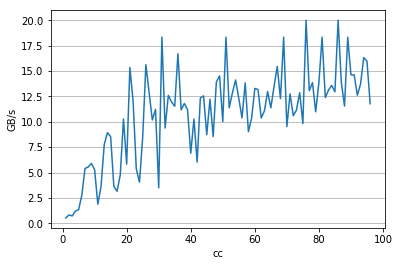

Highest write speed achieved is 20.0GB/s, when cc is 76


In [4]:
plt.plot(ccList, tr)
plt.xlabel("cc")
plt.ylabel("GB/s")
ax = plt.axes()        
ax.yaxis.grid()
plt.show()
trMax = max(tr)
trMaxIdx = tr.index(trMax) + 1
print("Highest write speed achieved is " + str(max(tr)) + "GB/s, when cc is " + str(trMaxIdx))